# DS-SF-30 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [57]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [58]:
len(df)

400

In [59]:
df.shape

(400, 4)

In [60]:
df.index

RangeIndex(start=0, stop=400, step=1)

Answer:  There are 400 observations or rows

> ### Question 2.  Create a summary table.

In [43]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [45]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer: The variable range (min and max number) is larger in GRE compared to GPA.

> ### Question 4.  Drop data points with missing data.

In [64]:
df_no_missing = df.dropna()
df_no_missing

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [65]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: The count no longer has 400 observations, because it dropped those observations with missing variables or data in the row cell.  The new count is now 397.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

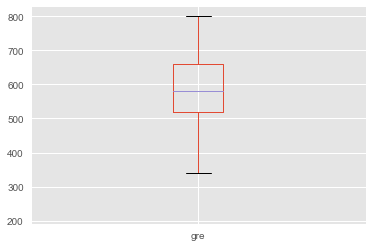

In [66]:
df['gre'].plot(kind='box')

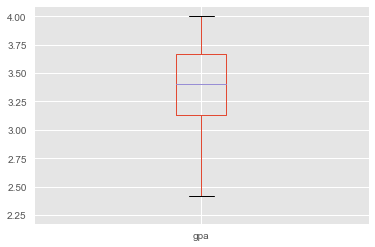

In [67]:
df['gpa'].plot(kind='box')

> ### Question 7.  What do boxplots show?

Answer: The minimum and maximum data set range, as well as identifying the 1st Quartile, Median or 2nd Quartile and 3rd Quartile.

> ### Question 8.  Plot the distribution of each variable.

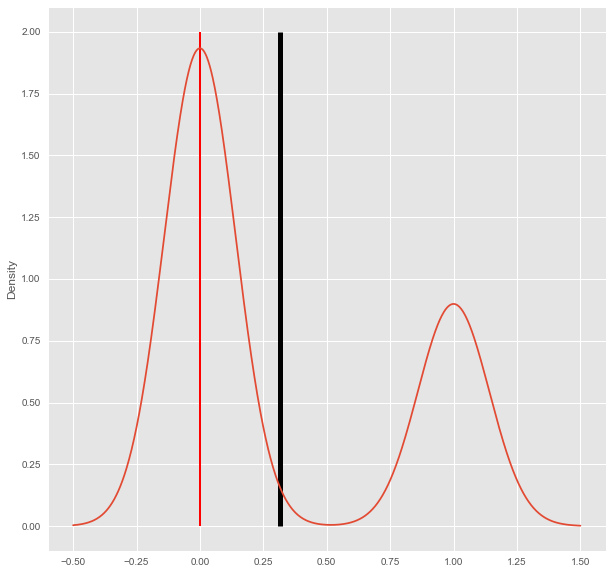

In [73]:
df['admit'].plot(kind="density",
              figsize=(10,10))

plt.vlines(df['admit'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=2,
           linewidth=5.0)

plt.vlines(df['admit'].median(),   # Plot red line at median
           ymin=0, 
           ymax=2, 
           linewidth=2.0,
           color="red")

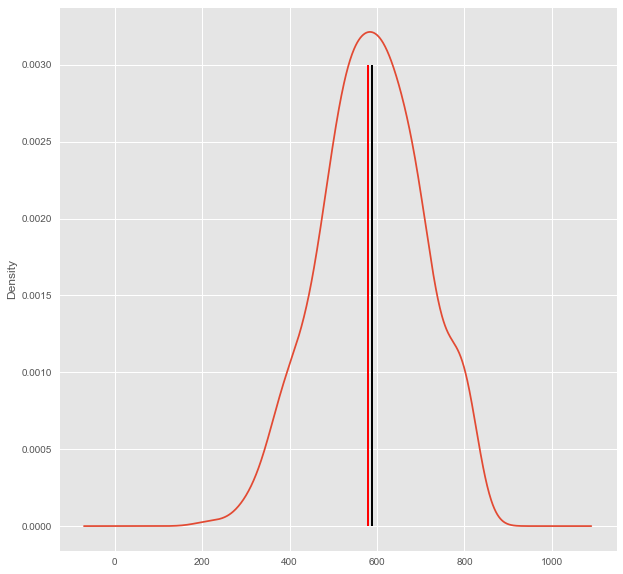

In [76]:
df['gre'].plot(kind="density",
              figsize=(10,10))

plt.vlines(df['gre'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.003,
           linewidth=2.0)

plt.vlines(df['gre'].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.003, 
           linewidth=2.0,
           color="red")df['gre'].plot(kind="density",
              figsize=(10,10))

plt.vlines(df['gre'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.003,
           linewidth=2.0)

plt.vlines(df['gre'].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.003, 
           linewidth=2.0,
           color="red")

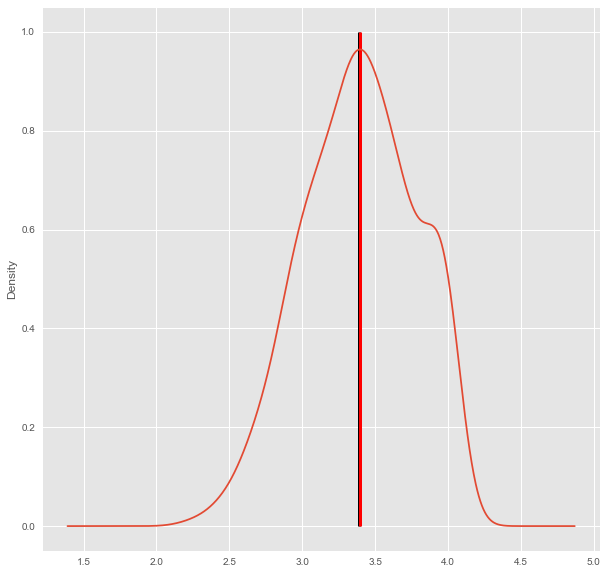

In [79]:
df['gpa'].plot(kind="density",
              figsize=(10,10))

plt.vlines(df['gpa'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=1,
           linewidth=3.0)

plt.vlines(df['gpa'].median(),   # Plot red line at median
           ymin=0, 
           ymax=1, 
           linewidth=3.0,
           color="red")

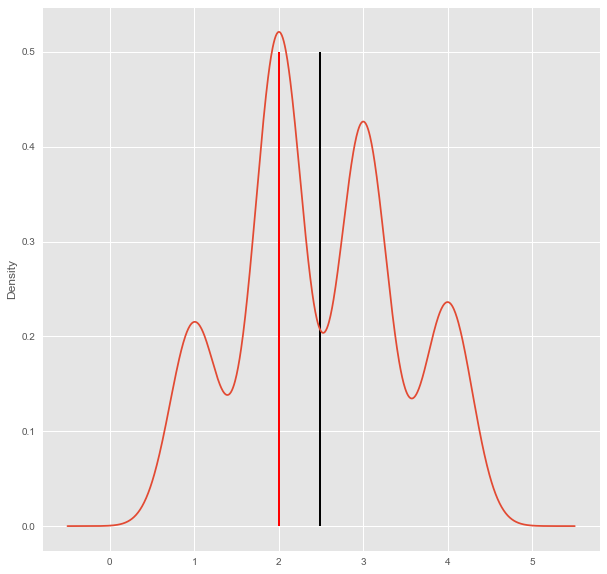

In [83]:
df['prestige'].plot(kind="density",
              figsize=(10,10))

plt.vlines(df['prestige'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.5,
           linewidth=2.0)

plt.vlines(df['prestige'].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.5, 
           linewidth=2.0,
           color="red")

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Answer: Yes both GRE and GPA have a normal distribution, thus would not need any correction.  

> ### Question 10.  Create a correlation matrix for the dataset

In [31]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

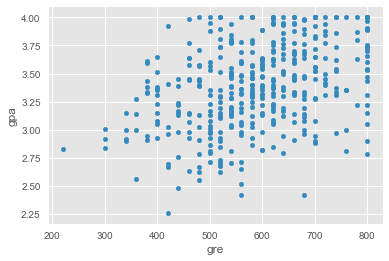

In [84]:
df.plot.scatter(x='gre', y='gpa')

Answer: GPA and GRE

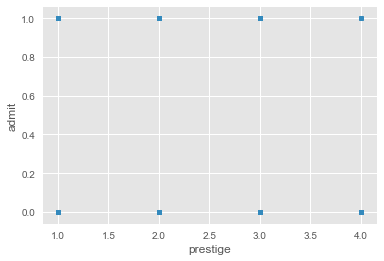

In [85]:
df.plot.scatter(x='prestige', y='admit')

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: Perform regression analyses with GPA and GRE on the x-axis and the probability of admission on the y-axis, for each prestige category.

> ### Question 13.  What is your hypothesis?

Answer:  The probability of admission is higher at a given GRE or GPA with a lower prestige.